In [1]:
from sklearn.linear_model import LinearRegression

In [25]:
lr_model = LinearRegression()
import numpy as np
x = np.arange(2000)
y = [i*i for i in x ]

In [26]:
x.shape

(2000,)

In [27]:
#x.shape =(20,1)

x.shape =(-1,1)

In [19]:
type(x)

numpy.ndarray

In [20]:
x.shape

(20, 1)

In [28]:
x_train = x[:int(x.shape[0]*0.8)]
x_test = x[int(x.shape[0]*0.8):]
y_train = y[:int(x.shape[0]*0.8)]
y_test = y[int(x.shape[0]*0.8):]

In [29]:
x_train.shape

(1600, 1)

In [30]:
lr_model.fit(x_train, y_train)

LinearRegression()

In [31]:
y_pred = lr_model.predict(x_test)

In [15]:
y_pred

array([205., 220., 235., 250.])

In [16]:
y_test

[256, 289, 324, 361]

In [32]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_pred, y_test))

693475217777.7986


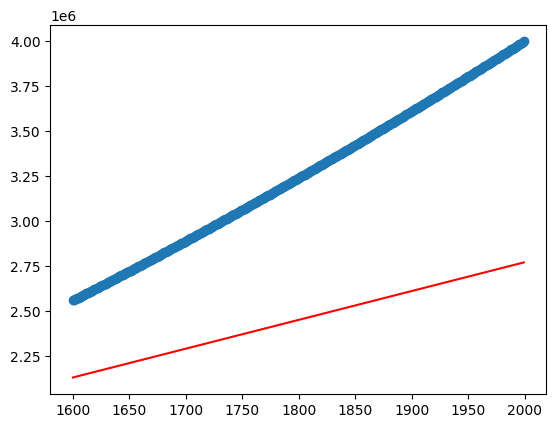

In [34]:
import matplotlib.pyplot as plt

plt.scatter(x_test, y_test)

plt.plot(x_test, y_pred, c='red')

In [35]:
print(lr_model.intercept_)

-425867.00000000047


In [36]:
print(lr_model.coef_[0])

1599.0000000000007


In [2]:
import yfinance as yf

reliance_df = yf.download('RELIANCE.NS', start ='2020-10-10', end= '2024-07-12')

[*********************100%%**********************]  1 of 1 completed


In [3]:
type(reliance_df)

pandas.core.frame.DataFrame

In [9]:
reliance_df.tail()

,Open,High,Low,Close,Adj Close,Volume,Tommorow close
Date,,,,,,,
2024-07-04,3114.000000,3135.000000,3101.600098,3108.050049,3108.050049,3418588,3177.250000
2024-07-05,3107.649902,3197.000000,3096.000000,3177.250000,3177.250000,6134855,3201.800049
2024-07-08,3178.000000,3217.600098,3165.050049,3201.800049,3201.800049,4750403,3180.550049
2024-07-09,3195.199951,3201.000000,3161.000000,3180.550049,3180.550049,3480001,3168.449951
2024-07-10,3190.000000,3195.000000,3126.300049,3168.449951,3168.449951,3567289,3161.300049


In [6]:
reliance_df['Tommorow close'] = reliance_df['Close'].shift(-1)

In [8]:
reliance_df = reliance_df.iloc[:-1]

In [10]:
x = reliance_df.drop(columns =['Tommorow close', 'Close', 'Adj Close'])

y = reliance_df['Tommorow close']

In [21]:
int(x.shape[0]*0.75)

694

In [ ]:
x

In [11]:
x_train = x.iloc[:int(x.shape[0]*0.75)]
x_test = x.iloc[int(x.shape[0]*0.75):]

y_train = y.iloc[:int(y.shape[0]*0.75)]
y_test = y.iloc[int(y.shape[0]*0.75):]



In [13]:
y_train.shape

(694,)

In [14]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(x_train, y_train)

y_pred = lr_model.predict(x_test)

In [16]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_pred, y_test))

1583.793365488815


In [18]:
y_test

Date
2023-07-28    2549.250000
2023-07-31    2513.199951
2023-08-01    2486.350098
2023-08-02    2475.899902
2023-08-03    2509.550049
                 ...     
2024-07-04    3177.250000
2024-07-05    3201.800049
2024-07-08    3180.550049
2024-07-09    3168.449951
2024-07-10    3161.300049
Name: Tommorow close, Length: 232, dtype: float64

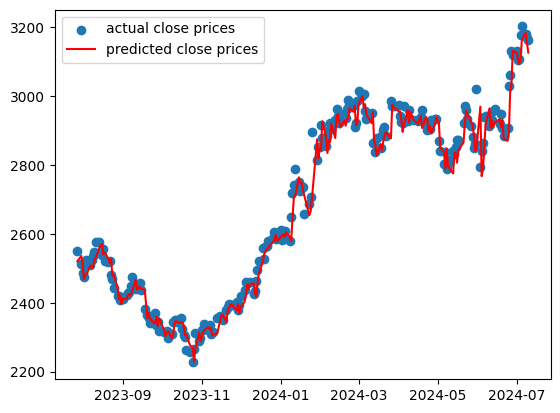

In [20]:
import matplotlib.pyplot as plt

plt.scatter(x_test.index, y_test, label ='actual close prices')

plt.plot(x_test.index, y_pred, label ='predicted close prices', c = 'red')

plt.legend()